# **PROJET BIO-INFO : L'impact de la hausse des températures sur la puissance des ouragans**

# Membres du groupe:

- Anderson TESS
- Fiacre MITOKPE
- Kenny RUFFINE
- Gneneman Stéphane Jean-Baptiste KONÉ 

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import folium
!pip install folium

In [75]:
#Dataset sur les cyclones (certaines lignes ont plus de virgules, c'est pourquoi on "skip" dans les bad_lines)
df2 = pd.read_csv("storms (1).csv", sep=",", engine="python", on_bad_lines="skip")
df2 = df2.drop(columns=["tropicalstorm_force_diameter", "hurricane_force_diameter", "pressure"]) # colonnes qu'on veut supprimer
df2 = df2[df2["status"] == "hurricane"] # on regarde que les ouragans pour le moment



# On garde que les moments min et max du vent pour chaque ouragan
df2["wind"] = pd.to_numeric(df2["wind"], errors="coerce")


In [76]:
# MAX WIND SPEEDS
df2_max = df2.loc[df2.groupby(["name","year"])["wind"].idxmax()] # on groupe les ouragans par nom, puis on garde le moment ou le vent est au max

# On trie le dataset par annee
df2_max = df2_max.sort_values(by="year", ascending=True) 

# on reset l'index pour faire plus propre
df2_max = df2_max.reset_index(drop=True)

# on affiche le dataset
df2_max

,name,year,month,day,hour,lat,long,status,category,wind
0,Eloise,1975,9,23,12,30.2,-86.3,hurricane,3.0,110
1,Doris,1975,9,2,6,36.4,-44.5,hurricane,2.0,95
2,Caroline,1975,8,31,0,24.0,-97.0,hurricane,3.0,100
3,Faye,1975,9,27,0,32.7,-64.2,hurricane,2.0,90
4,Blanche,1975,7,27,18,37.9,-68.0,hurricane,1.0,75
...,...,...,...,...,...,...,...,...,...,...
314,Fiona,2022,9,21,6,23.5,-71.8,hurricane,4.0,120
315,Martin,2022,11,2,18,36.1,-48.9,hurricane,1.0,75
316,Danielle,2022,9,4,18,38.4,-45.2,hurricane,1.0,75
317,Nicole,2022,11,9,23,26.6,-78.2,hurricane,1.0,65


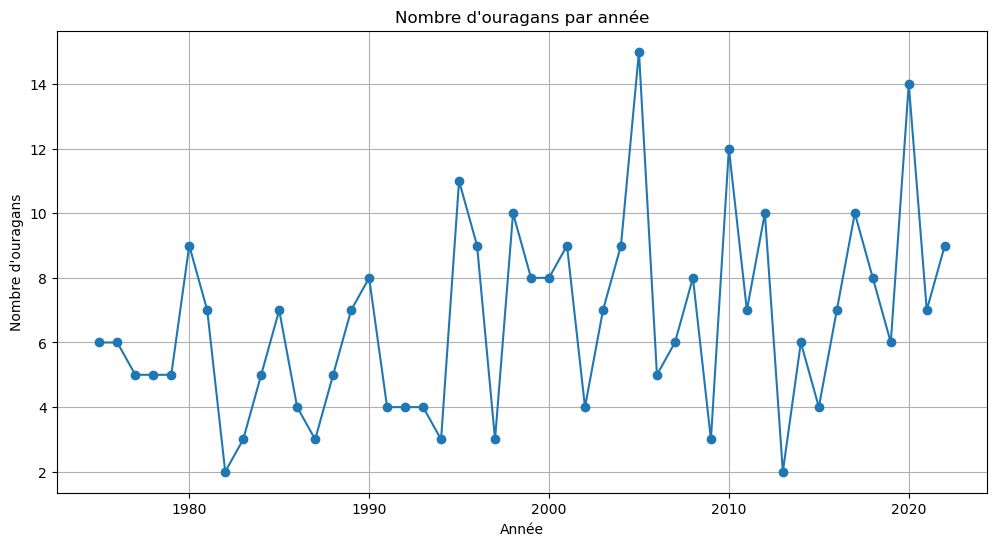

In [77]:
# Comptage du nombre d'ouragans par année
hurricanes_per_year = df2_max["year"].value_counts().sort_index()

# Tracé du graphique
plt.figure(figsize=(12, 6))
plt.plot(hurricanes_per_year.index, hurricanes_per_year.values, marker='o', linestyle='-')
plt.xlabel("Année")
plt.ylabel("Nombre d'ouragans")
plt.title("Nombre d'ouragans par année")
plt.grid(True)
plt.show()

In [78]:

# MIN WIND SPEEDS
df2_min = df2.loc[df2.groupby(["name","year"])["wind"].idxmin()] # on groupe les ouragans par nom, puis on garde le moment ou le vent est au max

# On trie le dataset par annee
df2_min = df2_min.sort_values(by="year", ascending=True) 

# on reset l'index pour faire plus propre
df2_min = df2_min.reset_index(drop=True)

# on affiche le dataset
df2_min


,name,year,month,day,hour,lat,long,status,category,wind
0,Eloise,1975,9,16,18,19.5,-68.4,hurricane,1.0,65
1,Doris,1975,8,31,0,34.9,-46.3,hurricane,1.0,65
2,Caroline,1975,8,30,0,23.3,-94.2,hurricane,1.0,65
3,Faye,1975,9,26,0,26.5,-60.0,hurricane,1.0,65
4,Blanche,1975,7,27,6,35.9,-70.0,hurricane,1.0,65
...,...,...,...,...,...,...,...,...,...,...
314,Fiona,2022,9,18,12,17.2,-66.2,hurricane,1.0,65
315,Martin,2022,11,2,12,35.1,-50.9,hurricane,1.0,65
316,Danielle,2022,9,2,12,37.8,-43.6,hurricane,1.0,65
317,Nicole,2022,11,9,23,26.6,-78.2,hurricane,1.0,65


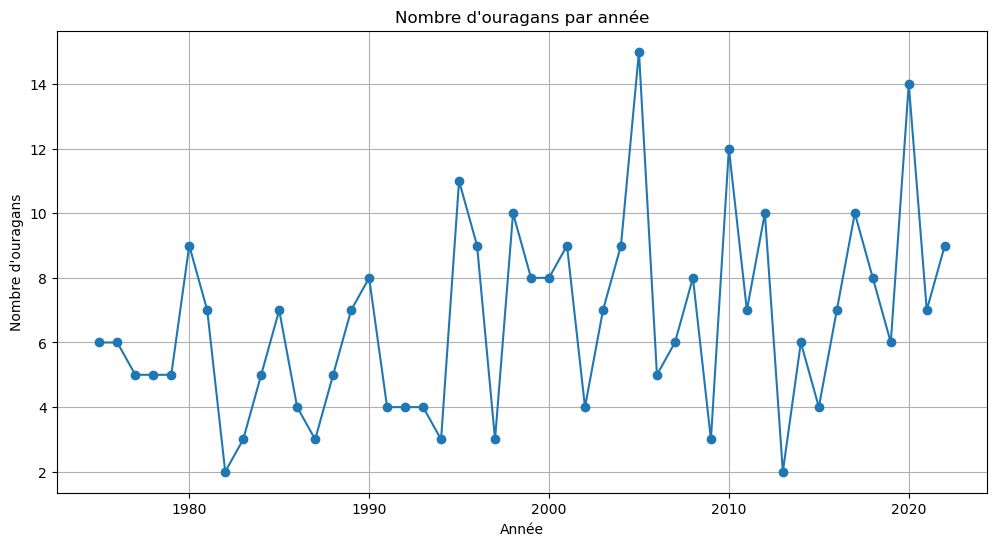

In [79]:
# Comptage du nombre d'ouragans par année
hurricanes_per_year = df2_min["year"].value_counts().sort_index()

# Tracé du graphique
plt.figure(figsize=(12, 6))
plt.plot(hurricanes_per_year.index, hurricanes_per_year.values, marker='o', linestyle='-')
plt.xlabel("Année")
plt.ylabel("Nombre d'ouragans")
plt.title("Nombre d'ouragans par année")
plt.grid(True)
plt.show()

In [80]:

def get_hurricane_data_by_index(df, index):
    """
    retourne une seule ligne du dataset en fonction de l'indice donné en paramètre.

    Paramètres:
    df (DataFrame): dataset des ouragans.
    index (int): indice de la ligne à recupérer.

    Returns:
    str : Une str Pandas contenant l'année, le mois, le jour, la latitude, la longitude et la catégorie, 
            ou un message d'erreur si l'index dépasse la taille du dataset.
    """

    required_columns = {"year", "month", "day", "lat", "long", "category"}

    if not required_columns.issubset(df.columns):
        return "Error: The dataset does not contain all the required columns."

    if index < 0 or index >= len(df):
        return "Error: Index out of range."

    return df.loc[index, ["year", "month", "day", "lat", "long", "category"]]


index = 5  
hurricane_data = get_hurricane_data_by_index(df2_max, index)
print(hurricane_data)


#même fonction mais stockée dans un array numpy


def get_hurricane_data_as_numpy(df,index):
    """
    retourne un array de type numpy.

    Paramètres:
    df (DataFrame): dataset des ouragans.
    index (int): indice de la ligne à recupérer

    retours:
    numpy.ndarray: un NumPy qui contient l'année, le mois, le jour, la latitude, la longitude, et la categorie d'un ouragan.
    """
    required_columns = {"year", "month", "day", "lat", "long", "category"}

    if not required_columns.issubset(df.columns):
        return "Error: The dataset does not contain all the required columns."

    if index < 0 or index >= len(df):
        return "Error: Index out of range."

    return df.loc[index, ["year", "month", "day", "lat", "long", "category"]].to_numpy()

index = 5  
hurricane_data_array = get_hurricane_data_as_numpy(df2_max,index)
print(hurricane_data_array)



year        1975
month         10
day            2
lat         35.3
long       -69.8
category     4.0
Name: 5, dtype: object
[1975 10 2 35.3 -69.8 4.0]


In [103]:


def plot_hurricane_on_map_with_category(df):
    """
    Affiche les positions des cyclones (latitude, longitude) sur une carte interactive avec une icône
    correspondant à la catégorie de chaque ouragan.
    
    Parameters:
    df (DataFrame): Le dataset des cyclones avec des colonnes 'lat', 'long' et 'category'.
    
    Returns:
    folium.Map: Carte interactive affichant les cyclones avec des icônes basées sur leur catégorie.
    """
    # Créer une carte centrée autour d'un point par défaut (ici, centre de l'océan Atlantique)
    hurricane_map = folium.Map(location=[20, -50], zoom_start=3)

    # Vérifier que les colonnes nécessaires existent dans le DataFrame
    if 'lat' in df.columns and 'long' in df.columns and 'category' in df.columns:
        # Dictionnaire pour associer une couleur à chaque catégorie
        category_colors = {
            1: 'blue',     # Catégorie 1 
            2: 'green',    # Catégorie 2
            3: 'yellow',   # Catégorie 3 
            4: 'orange',   # Catégorie 4 
            5: 'red'       # Catégorie 5  
        }
        
        # Ajouter un marqueur pour chaque cyclone en fonction de la latitude et la longitude)
        for index, row in df.iterrows():
            category = row['category']
            color = category_colors.get(category, 'gray')  # Utiliser 'gray' par défaut si la catégorie est inconnue
            
            folium.Marker(
                location=[row['lat'], row['long']],
                popup=f"Name : {row['name']}, Year: {row['year']}, Month: {row['month']}, Day: {row['day']}, Category: {category}",
                icon=folium.Icon(color=color, icon='info-sign')
            ).add_to(hurricane_map)
    else:
        print("Erreur : Les colonnes 'lat', 'long' et 'category' sont nécessaires dans le DataFrame.")
    
    
    return hurricane_map


hurricane_map = plot_hurricane_on_map_with_category(df2_max)
hurricane_map



    

/var/folders/jf/ky5d7g9j46b3lxr7qf66yw0r0000gn/T/ipykernel_53206/1055750862.py:34: UserWarning: color argument of Icon should be one of: {'beige', 'lightgray', 'lightgreen', 'darkblue', 'black', 'white', 'darkgreen', 'darkpurple', 'cadetblue', 'green', 'orange', 'lightblue', 'purple', 'lightred', 'pink', 'darkred', 'gray', 'blue', 'red'}.
  icon=folium.Icon(color=color, icon='info-sign')
